<a href="https://colab.research.google.com/github/codingfreshie/Wine-quality/blob/main/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA and Basic Machine Learning with the Wine Quality Dataset**

##**Dataset Preparation**

###uploading kaggle.json into colab

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neeharika009","key":"cf092cf39f8daaf48d4885e777e6c448"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install kaggle


###Download kaggle dataset

In [ ]:
!kaggle datasets download -d yasserh/wine-quality-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
wine-quality-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


###Importing dataset into pandas

In [ ]:
!unzip wine-quality-dataset.zip
import pandas as pd
df = pd.read_csv('WineQT.csv')
df.head()



Archive:  wine-quality-dataset.zip
replace WineQT.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WineQT.csv              


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


###Handling Missing Data

In [ ]:
df.isnull().sum()  # Check for missing values


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


##**Exploratory Data Analysis (EDA)**

###Summary statistics

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


###Visualisations

####Histograms for key features

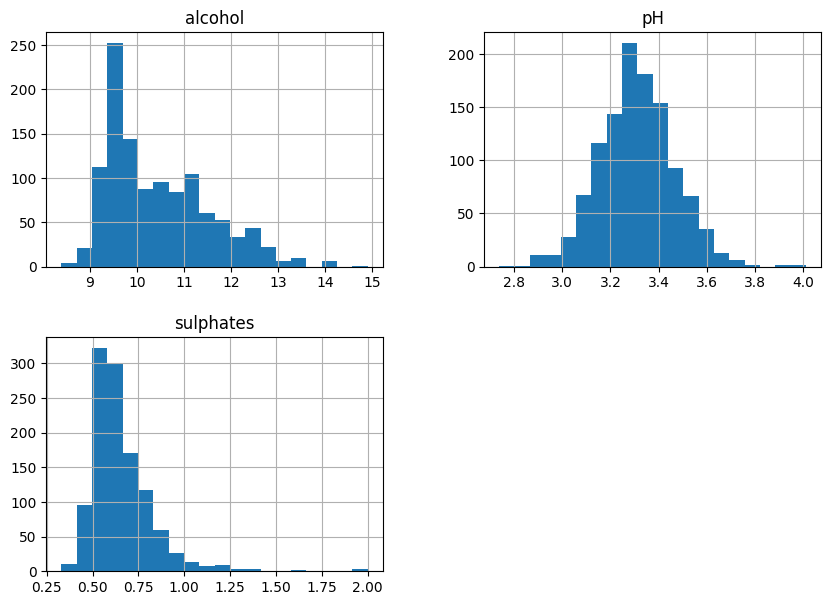

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['alcohol', 'pH', 'sulphates']
df[features].hist(bins=20, figsize=(10,7))
plt.show()

####Correlation Heatmap

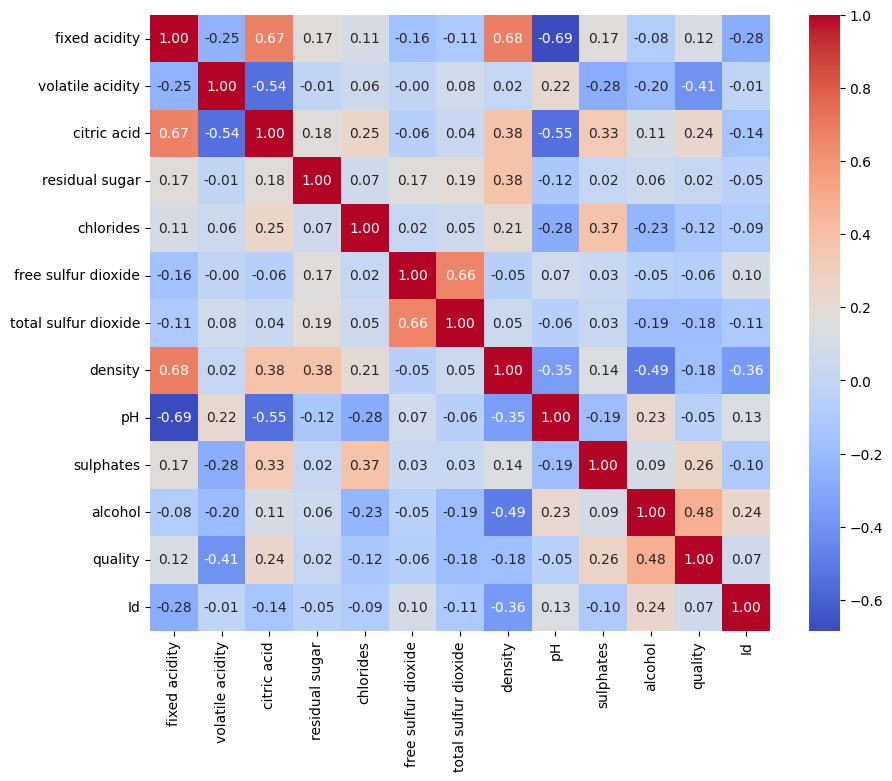

In [ ]:
plt.figure(figsize=(10,8))
df1 = df.drop('quality_label',axis=1)
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



##**Feature Engineering**

In [ ]:
df['quality_label'] = df['quality'].apply(lambda x: "good" if x >= 7 else "not good")
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


##**Machine Learning Model**

###Data splitting


In [ ]:
X = df.drop('quality_label',axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


####Model Training

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

####Model Evaluation

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 1.0
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0 96  0  0  0]
 [ 0  0 99  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0  2]]


##Varius Models

###Model Evaluation and Comparision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')


Random Forest Accuracy: 0.982532751091703
Gradient Boosting Accuracy: 1.0


##Model Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


##Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {scores}')


Cross-Validation Scores: [1. 1. 1. 1. 1.]
